# <font color="green"> Library Imports </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

import warnings

# <font color="green"> Helper functions </font>

In [2]:
def descriptive_statistics(df):
    
    df = df.select_dtypes(include=['int64', 'float64'])

    # Descriptive statistics

    df_descriptive = pd.DataFrame(data=[df.apply(np.min),
                                        df.apply(np.max),
                                        df.apply(lambda x: np.max(x) - np.min(x)),
                                        df.apply(np.mean),
                                        df.apply(np.median),
                                        df.apply(np.std),
                                        df.apply(lambda x: x.skew()),
                                        df.apply(lambda x: x.kurtosis())],
                                  index=np.array(['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']))
    
    return df_descriptive



def jupyter_settings():
    
    pd.options.display.max_columns = None   
    


warnings.filterwarnings("ignore")
jupyter_settings()

# 1.0 Data import and basic inspection

## <font color="gray"> 1.1 Data loading and checking </font>

In [3]:
# Data loading

## Importing db credentials

db_credentials = pd.read_csv('/mnt/d/Gustavo/health-insurance/db_credentials.txt', header=None)

host = db_credentials[0][0]

port = db_credentials[1][0]

database = db_credentials[2][0]

user = db_credentials[3][0]

psw = db_credentials[4][0]


In [4]:
# Selecting data from database - SQL query ('insurance' table - pa004 schema)

query = """
    SELECT *
    FROM pa004.insurance

"""

# Connecting to Postgres database

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, psw, host, port, database))


# executing sql query

df_insurance = pd.read_sql_query(query, con=engine)

# closing database connection

engine.dispose()

In [5]:
# Selecting data from database - SQL query ('users' table - pa004 schema)

query = """
    SELECT *
    FROM pa004.users

"""

# Connecting to Postgres database

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, psw, host, port, database))


# executing sql query

df_users = pd.read_sql_query(query, con=engine)

# closing database connection

engine.dispose()

In [6]:
# Selecting data from database - SQL query ('vehicle' table - pa004 schema)

query = """
    SELECT *
    FROM pa004.vehicle

"""

# Connecting to Postgres database

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, psw, host, port, database))


# executing sql query

df_vehicle = pd.read_sql_query(query, con=engine)

# closing database connection

engine.dispose()

In [7]:
# Checking tables

df_insurance.head()

,id,previously_insured,annual_premium,vintage,response
0,1,0,40454.0,217,1
1,2,0,33536.0,183,0
2,3,0,38294.0,27,1
3,4,1,28619.0,203,0
4,5,1,27496.0,39,0


In [8]:
df_users.head()

,id,gender,age,region_code,policy_sales_channel
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,4,Male,21,11.0,152.0
4,5,Female,29,41.0,152.0


In [9]:
df_vehicle.head()

,id,driving_license,vehicle_age,vehicle_damage
0,1,1,> 2 Years,Yes
1,2,1,1-2 Year,No
2,3,1,> 2 Years,Yes
3,4,1,< 1 Year,No
4,5,1,< 1 Year,No


In [10]:
# Merging tables

## merging df_users with df_insurance
df = pd.merge(left=df_users, right=df_insurance, how='left', on='id')

# resulting df with df_vehicle
df = pd.merge(left=df, right=df_vehicle, how='left', on='id')

df

,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage
0,1,Male,44,28.0,26.0,0,40454.0,217,1,1,> 2 Years,Yes
1,2,Male,76,3.0,26.0,0,33536.0,183,0,1,1-2 Year,No
2,3,Male,47,28.0,26.0,0,38294.0,27,1,1,> 2 Years,Yes
3,4,Male,21,11.0,152.0,1,28619.0,203,0,1,< 1 Year,No
4,5,Female,29,41.0,152.0,1,27496.0,39,0,1,< 1 Year,No
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,26.0,26.0,1,30170.0,88,0,1,1-2 Year,No
381105,381106,Male,30,37.0,152.0,1,40016.0,131,0,1,< 1 Year,No
381106,381107,Male,21,30.0,160.0,1,35118.0,161,0,1,< 1 Year,No
381107,381108,Female,68,14.0,124.0,0,44617.0,74,0,1,> 2 Years,Yes


In [11]:
# Reorganizing columns

df = df[['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
         'previously_insured', 'annual_premium', 'vintage',
         'driving_license', 'vehicle_age', 'vehicle_damage', 'response']]

In [12]:
# Data dimensions

print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Number of rows: 381109
Number of columns: 12


In [13]:
# checking data types

df.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                   int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
response                  int64
dtype: object

In [14]:
# Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   region_code           381109 non-null  float64
 4   policy_sales_channel  381109 non-null  float64
 5   previously_insured    381109 non-null  int64  
 6   annual_premium        381109 non-null  float64
 7   vintage               381109 non-null  int64  
 8   driving_license       381109 non-null  int64  
 9   vehicle_age           381109 non-null  object 
 10  vehicle_damage        381109 non-null  object 
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


In [15]:
# Checking for NA's

df.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
driving_license         0
vehicle_age             0
vehicle_damage          0
response                0
dtype: int64

In [16]:
# Checking for duplicate rows

df.duplicated().sum()

0

In [17]:
# Response variable

df['response'].value_counts()

0    334399
1     46710
Name: response, dtype: int64

In [19]:
# Response variable - percentage

print('Percentage of people that did not purchase health insurance: {:.2f}'.format(df['response'].value_counts(normalize=True)[0]))
print('Percentage of people that purchased health insurance: {:.2f}'.format(df['response'].value_counts(normalize=True)[1]))


Percentage of people that did not purchase health insurance: 0.88
Percentage of people that purchased health insurance: 0.12


In [20]:
# Setting 'id' column as index

df = df.set_index('id')

df

,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,driving_license,vehicle_age,vehicle_damage,response
id,,,,,,,,,,,
1,Male,44,28.0,26.0,0,40454.0,217,1,> 2 Years,Yes,1
2,Male,76,3.0,26.0,0,33536.0,183,1,1-2 Year,No,0
3,Male,47,28.0,26.0,0,38294.0,27,1,> 2 Years,Yes,1
4,Male,21,11.0,152.0,1,28619.0,203,1,< 1 Year,No,0
5,Female,29,41.0,152.0,1,27496.0,39,1,< 1 Year,No,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,26.0,26.0,1,30170.0,88,1,1-2 Year,No,0
381106,Male,30,37.0,152.0,1,40016.0,131,1,< 1 Year,No,0
381107,Male,21,30.0,160.0,1,35118.0,161,1,< 1 Year,No,0


In [ ]:
# Adjusting data types





## <font color="gray"> 1.2 Descriptive statistics </font>

### <i>1.2.1 descriptive statistics</i>

In [28]:
# Numerical and categorical attributes

# numerical attributes
num_attributes = df.select_dtypes(['int64', 'float64'])

# categorical attributes
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [29]:
# Descriptive statistics

descriptive_statistics(df)

,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,driving_license,response
min,20.000000,0.000000,1.000000,0.000000,2630.000000,10.000000,0.000000,0.000000
max,85.000000,52.000000,163.000000,1.000000,540165.000000,299.000000,1.000000,1.000000
range,65.000000,52.000000,162.000000,1.000000,537535.000000,289.000000,1.000000,1.000000
mean,38.822584,26.388807,112.034295,0.458210,30564.389581,154.347397,0.997869,0.122563
median,36.000000,28.000000,133.000000,0.000000,31669.000000,154.000000,1.000000,0.000000
std,15.511591,13.229871,54.203924,0.498251,17213.132474,83.671194,0.046109,0.327935
skew,0.672539,-0.115266,-0.900008,0.167747,1.766087,0.003030,-21.595182,2.301906
kurtosis,-0.565655,-0.867857,-0.970810,-1.971871,34.004569,-1.200688,464.354302,3.298788


### <i>1.2.2 general view of attributes</i>

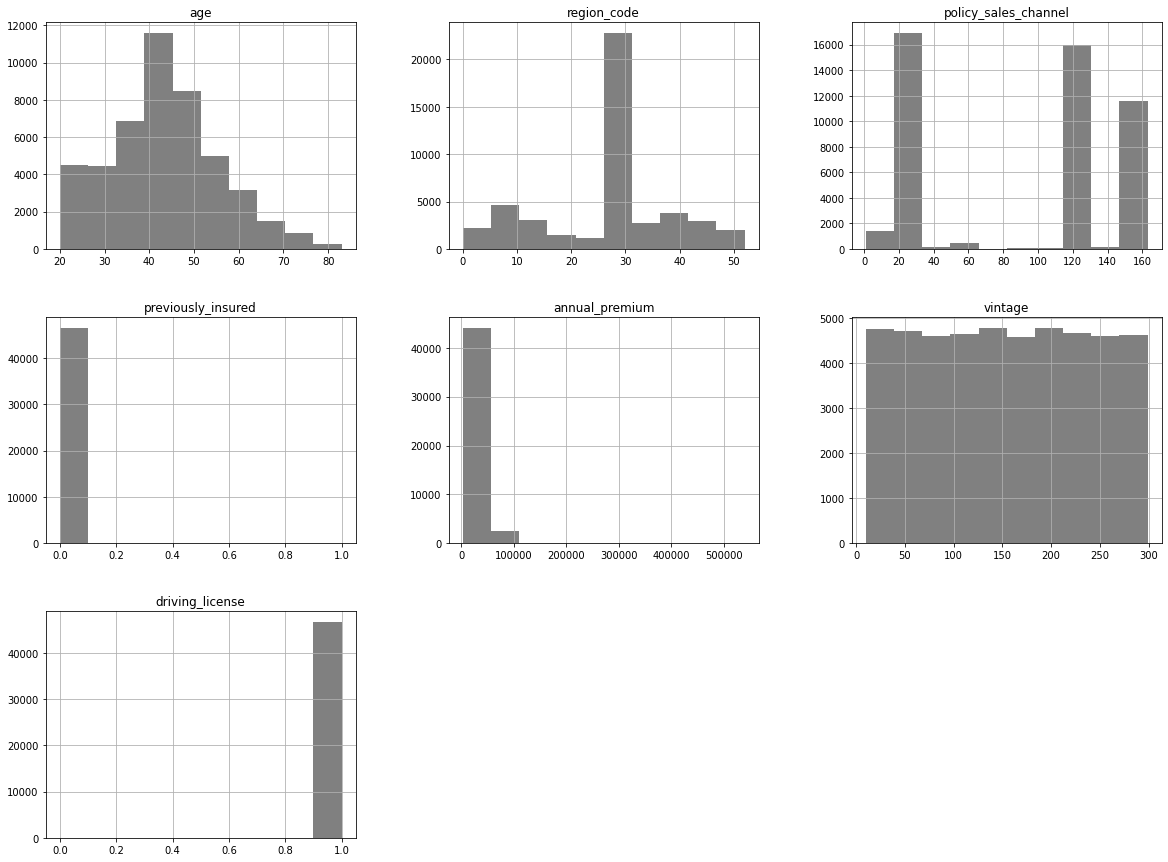

In [44]:
# Numeric attributes view

# Exploring numerical attributes

# as we are interested in people who have purchased health insurance, in this evaluation we are going
# to filter the dataset based on this condition to see the behaviour of numerical attributes for this group

# we are not showing here the distribution for the numerical variable 'response' because it is our target variable

num_attributes.loc[num_attributes['response']==1, num_attributes.columns!='response'].hist(figsize=(20,15), color='gray');

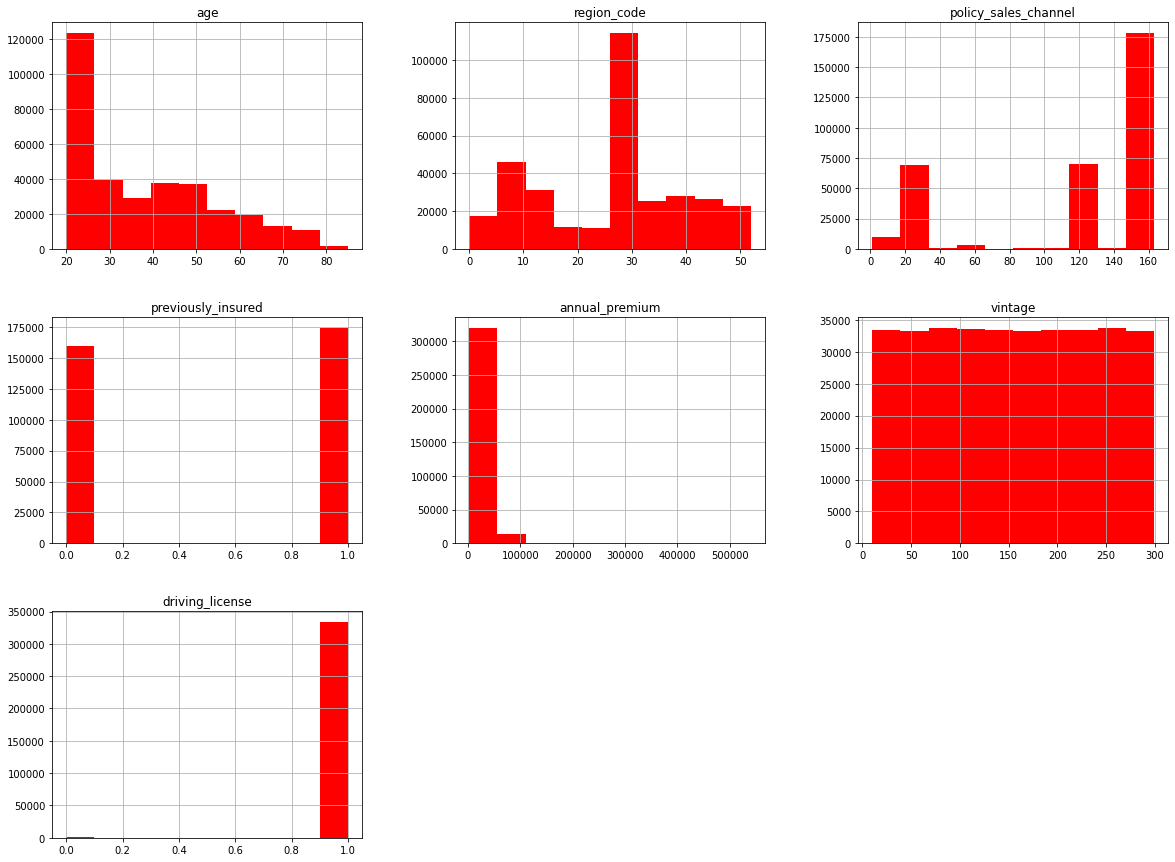

In [45]:
# Now let's compare the distributions for the same variables with people who did not purchase
## health insurance

num_attributes.loc[num_attributes['response']==0, num_attributes.columns!='response'].hist(figsize=(20,15), color='red');

* It looks like there are some differences between the two evaluated groups when looking closely at some variables like age, policy sales channel and previously insured.
* Probably for the features where there are obvious differences this are going to help the machine learning model to figure out whether the customer is going to purchase a health insurance or not (or the % probability of doing so). 

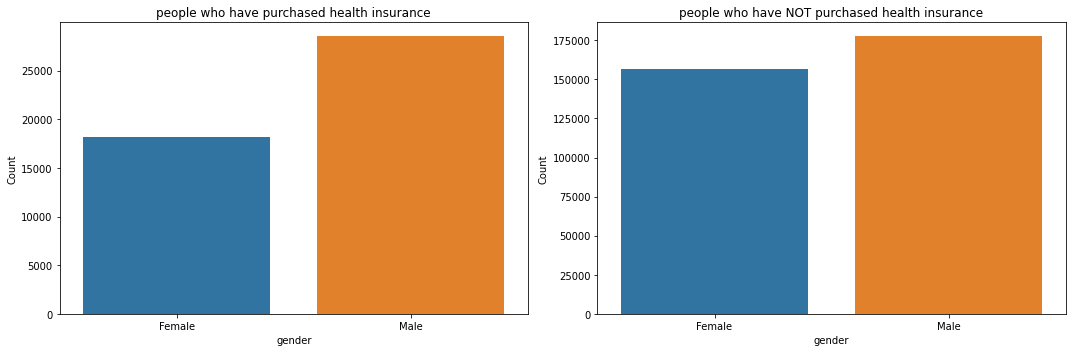

In [85]:
# Categorical attributes view


plt.figure(figsize=(15,5))

# gender profile for people who have purchased health insurance

plt.subplot(1,2,1)
sns.barplot(x='gender',
            y=0,
            data=df.loc[df['response']==1, ['gender']].groupby('gender').size().reset_index())

plt.ylabel('Count')
plt.title('people who have purchased health insurance')


# gender profile for people who have not purchased health insurance

plt.subplot(1,2,2)
sns.barplot(x='gender',
            y=0,
            data=df.loc[df['response']==0, ['gender']].groupby('gender').size().reset_index())

plt.ylabel('Count')
plt.title('people who have NOT purchased health insurance')

plt.tight_layout();

In [ ]:
# Continuar fazendo as mesmas avaliações para as demais variáveis categóricas

In [50]:
df.loc[df['response']==1, ['gender', 'vehicle_age', 'vehicle_damage','response']]

,gender,vehicle_age,vehicle_damage,response
id,,,,
1,Male,> 2 Years,Yes,1
3,Male,> 2 Years,Yes,1
8,Female,1-2 Year,Yes,1
11,Female,1-2 Year,Yes,1
16,Male,1-2 Year,Yes,1
...,...,...,...,...
381058,Male,1-2 Year,Yes,1
381062,Female,1-2 Year,Yes,1
381074,Female,1-2 Year,Yes,1


# 2.0 Feature engineering

## <font color="gray"> 2.1 Creating new features </font>

## <font color="gray"> 2.2 Hypothesis to be validated </font>

# 3.0 Data filtering

# 4.0 Exploratory Data Analysis (EDA)

## <font color="gray"> 4.1 Univariate analysis </font>

In [ ]:
# Response variable

### <i>4.1.1 numerical attributes</i>

### <i>4.1.2 categorical attributes</i>

## <font color="gray"> 4.2 Bivariate analysis </font>

### <i>4.2.1 validating hypothesis raised</i>

### <i>4.2.2 statistical hypothesis testing</i>

## <font color="gray"> 4.3 Multivariate analysis </font>

### <i>4.3.1 numerical attributes</i>

### <i>4.3.2 categorical attributes</i>

# 5.0 Data preparation

## <font color="gray"> 5.1 Train/Test split </font>

## <font color="gray"> 5.2 Scaling - numerical attributes </font>

## <font color="gray"> 5.3 Encoding - categorical attributes </font>

# 6.0 Feature selection

## <font color="gray"> 6.1 Boruta algorithm </font>

## <font color="gray"> 6.2 Columns selected by Boruta</font>

# 7.0 Machine learning

## <font color="gray"> 7.1 Baseline model </font>

## <font color="gray"> 7.2 Logistic Regression </font>

## <font color="gray"> 7.3 Random Forest </font>

## <font color="gray"> 7.4 XGBoost </font>

## <font color="gray"> 7.5 KNN </font>

Cross validation

# 8.0 Hyperparameter fine tuning

## <font color="gray"> 8.1 Random search </font>

## <font color="gray"> 8.2 Tuned final model </font>

# 9.0 Error interpretation

## <font color="gray"> 9.1 Main </font>

# 10.0 Deploy

## <font color="gray"> 10.1 Class data_prep.py </font>

## <font color="gray"> 10.2 API_handler.py </font>

## <font color="gray"> 10.3 API tester local </font>

## <font color="gray"> 10.4 API tester remote/cloud </font>